<a href="https://colab.research.google.com/github/dote7ant/Moringa_CoreW1/blob/master/moringa_core_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Getting Started

**a) Question**


---

Figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

b) Defining the Metric for Success


c) Understanding the context

d) Recording the Experimental Design

e) Data Relevance

In [ ]:
# import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

In [ ]:
# import our data

# East Africa data for the countries Kenya, Uganda, Tanzania and Rwanda
url = "http://bit.ly/FinancialDataset"
url_1 = "http://bit.ly/VariableDefinitions"
df = pd.read_csv(url)
df_def = pd.read_csv(url_1)

In [ ]:
df.shape

(23524, 13)

The dataset has 23,524 rows and 13 columns

In [ ]:
print(df_def)

      Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming

In [ ]:
# Previewing the first 5 
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the last 5 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# rename the columns
# changing and formatting the dataset column names:
df.rename(columns={"country": "country", "year": "year", "uniqueid": "uniqueid", "Has a Bank account": "bank_acc", "Type of Location": "location", "Cell Phone Access": "cell_phone", "household_size": "household_size", "Respondent Age": "age", "gender_of_respondent": "gender", "The relathip with head": "relationship", "marital_status": "marital_status", "Level of Educuation": "education", "Type of Job": "job_type"}, inplace=True)
df.head()

,country,year,uniqueid,bank_acc,location,cell_phone,household_size,age,gender,relationship,marital_status,education,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# drop the uniqueid column
df = df.drop(columns = ['uniqueid'])
df.head()

,country,year,bank_acc,location,cell_phone,household_size,age,gender,relationship,marital_status,education,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Get data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         23510 non-null  object 
 1   year            23524 non-null  int64  
 2   bank_acc        23488 non-null  object 
 3   location        23509 non-null  object 
 4   cell_phone      23513 non-null  object 
 5   household_size  23496 non-null  float64
 6   age             23490 non-null  float64
 7   gender          23490 non-null  object 
 8   relationship    23520 non-null  object 
 9   marital_status  23492 non-null  object 
 10  education       23495 non-null  object 
 11  job_type        23494 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.2+ MB


**Validation**


---
By going through the following resources we determine that the data that we have is valid.
1. https://fsdkenya.org/publication/finaccess2019/
2. http://www.statistics.gov.rw/publication/finscope-rwanda-2016
3. http://www.fsdt.or.tz/finscope/
4. http://fsduganda.or.ug/finscope-2018-survey-report/


**Checking for outliers**

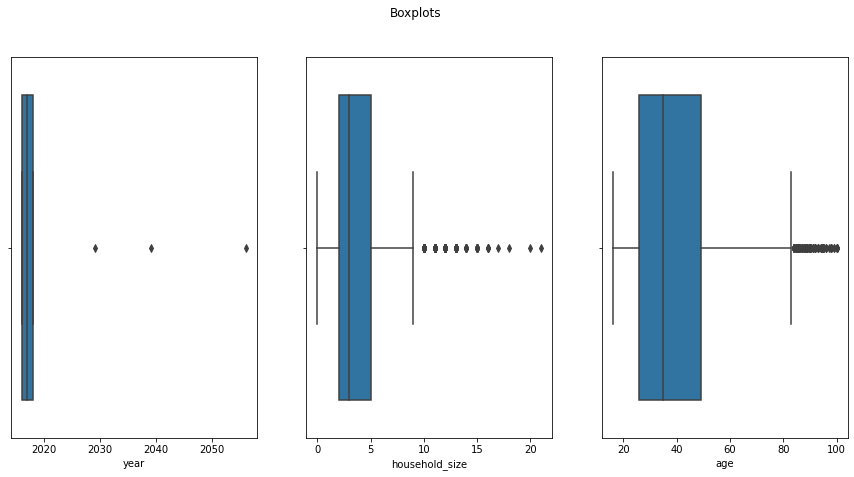

In [ ]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(15, 7))
fig.suptitle('Boxplots')

sns.boxplot(df['year'], ax=ax1)
sns.boxplot(df['household_size'], ax=ax2)
sns.boxplot(df['age'], ax=ax3)

plt.show()

look at the data

In [ ]:
# display the data
df[['year', 'household_size', 'age']].head(50)

We notice that the respondents age has a lot of outliers but we decide not to remove them since they might give insight on what the older generation considers about finance.

In [ ]:
# Find missing values
df.isnull().sum()

country           14
year               0
bank_acc          36
location          15
cell_phone        11
household_size    28
age               34
gender            34
relationship       4
marital_status    32
education         29
job_type          30
dtype: int64

There are missing values across the columns

In [ ]:
# preview missing values
a = pd.isnull(df['country'])  
# displaying data only with "country" = NaN  
print(df[a])

      country  year  ...            education              job_type
18200     NaN  2017  ...    Primary education  Remittance Dependent
18201     NaN  2017  ...    Primary education         Self employed
18202     NaN  2017  ...    Primary education             No Income
18203     NaN  2017  ...  No formal education         Self employed
18204     NaN  2017  ...  No formal education         Self employed
18205     NaN  2017  ...  Secondary education  Remittance Dependent
18206     NaN  2017  ...  No formal education         Self employed
18207     NaN  2017  ...  No formal education         Self employed
18208     NaN  2017  ...  No formal education         Self employed
18312     NaN  2017  ...  Secondary education             No Income
18313     NaN  2017  ...  No formal education   Informally employed
18314     NaN  2017  ...    Primary education         Self employed
18315     NaN  2017  ...    Primary education         Self employed
18316     NaN  2017  ...  No formal education  R

In [ ]:
# dealing with missing data
# we decide to remove all our missing values from the data 
df_clean = df.dropna()

In [ ]:
# find if there still any null values
df_clean.isnull().sum()

country           0
year              0
bank_acc          0
location          0
cell_phone        0
household_size    0
age               0
gender            0
relationship      0
marital_status    0
education         0
job_type          0
dtype: int64

In [ ]:
# show our new shape for the dataset
df_clean.shape

(23343, 12)

In [ ]:
print(df_clean.head())
print(df_clean.tail())

  country  year  ...                        education                   job_type
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed

[5 rows x 12 columns]
      country  year  ...            education       job_type
23519  Uganda  2018  ...  No formal education   Other Income
23520  Uganda  2018  ...  Secondary education   Other Income
23521  Uganda  2018  ...    Primary education   Other Income
23522  Uganda  2018  ...  Secondary education  Self employed
23523  Uganda  2018  ...  Secondary education      No Income

[5 rows x 12 columns]


# 2. Univariate analysis

In [ ]:
# Exploratory analysis
# here we attempt to find the most item in the columns and frequency
df_clean.describe(include=np.object)

,country,bank_acc,location,cell_phone,gender,relationship,marital_status,education,job_type
count,23343,23343,23343,23343,23343,23343,23343,23343,23343
unique,4,2,2,2,2,6,5,7,10
top,Rwanda,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8684,20046,14264,17334,13767,12730,10700,12689,6361


In [ ]:
# calculate the first quartile
Q1 = df_clean.quantile(0.25)

# display the first quartile
Q1

year              2016.0
bank_acc             0.0
location             0.0
cell_phone           0.0
household_size       2.0
age                 26.0
gender               0.0
relationship         1.0
marital_status       2.0
education            3.0
Name: 0.25, dtype: float64

In [ ]:
# calculate the third quartile
Q3 = df_clean.quantile(0.75)

# display the third quartile
Q3

year              2018.0
bank_acc             0.0
location             1.0
cell_phone           1.0
household_size       5.0
age                 49.0
gender               1.0
relationship         5.0
marital_status       3.0
education            4.0
Name: 0.75, dtype: float64

In [ ]:
# Calculate the Inter quartile range IQR
IQR = Q3 - Q1

# display the IQR
IQR

year               2.0
bank_acc           0.0
location           1.0
cell_phone         1.0
household_size     3.0
age               23.0
gender             1.0
relationship       4.0
marital_status     1.0
education          1.0
dtype: float64

In [ ]:
# find and dispay the standard deviation
df_clean.std()

year               0.901740
bank_acc           0.348278
location           0.487520
cell_phone         0.437223
household_size     2.281184
age               16.519803
gender             0.491886
relationship       1.893657
marital_status     0.997860
education          1.208854
dtype: float64

In [ ]:
# find and display the variance
df_clean.var()

year                0.813136
bank_acc            0.121298
location            0.237676
cell_phone          0.191164
household_size      5.203798
age               272.903908
gender              0.241952
relationship        3.585937
marital_status      0.995724
education           1.461329
dtype: float64

In [ ]:
# find and display the skew
df_clean.skew()

year              4.223164
bank_acc          2.060362
location          0.455656
cell_phone       -1.109726
household_size    0.974109
age               0.840662
gender            0.365034
relationship      0.624390
marital_status   -0.681969
education        -0.022775
dtype: float64

In [ ]:
# find and display the kurtosis
df_clean.kurt()

year              164.914183
bank_acc            2.245282
location           -1.792531
cell_phone         -0.768575
household_size      1.153869
age                 0.098447
gender             -1.866910
relationship       -1.396786
marital_status      0.734491
education           0.231030
dtype: float64

In [ ]:
# finding the frequency of the countries
data = df_clean
frequency_df = pd.DataFrame(data, columns=['country'])
frequency_df

# Creating our frequency table
# ---
frequency_df.country.value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

In [ ]:
# finding the frequency of the job type

frequency_df = pd.DataFrame(data, columns=['job_type'])
frequency_df

# Creating our frequency table
# ---
frequency_df.job_type.value_counts()

Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: job_type, dtype: int64

In [ ]:
# finding the frequency of relationship
data = df
frequency_df = pd.DataFrame(data, columns=['relationship'])
frequency_df

# Creating our frequency table
# ---
frequency_df.relationship.value_counts()

Head of Household      12829
Spouse                  6518
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship, dtype: int64

In [ ]:
# finding the frequency of marital status
frequency_df = pd.DataFrame(data, columns=['marital_status'])
frequency_df

# Creating our frequency table
# ---
frequency_df.marital_status.value_counts()

Married/Living together    10739
Single/Never Married        7971
Widowed                     2702
Divorced/Seperated          2072
Dont know                      8
Name: marital_status, dtype: int64

**Plots**

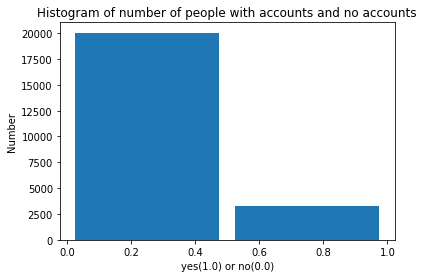

In [ ]:
# histogram

points = df_clean['bank_acc']
plt.hist(points, bins=2, histtype='bar', rwidth=0.9)
plt.ylabel('Number')
plt.xlabel('yes(1.0) or no(0.0)')
plt.title('Histogram of number of people with accounts and no accounts')
plt.show()

Implementing the solution


In [ ]:
# Figure out how we can predict which individuals are most likely to have or use a bank account.
a = df_clean['bank_acc'] == 'Yes'
b = df_clean[a]
c = b['bank_acc'].count()
print("There are", c, "individuals with bank accounts!")

# while we cannot predict who is likely to have a bank account yet we can determine who uses a bank account

There are 3297 individuals with bank accounts!


# 3. Bivariate analysis

Plots

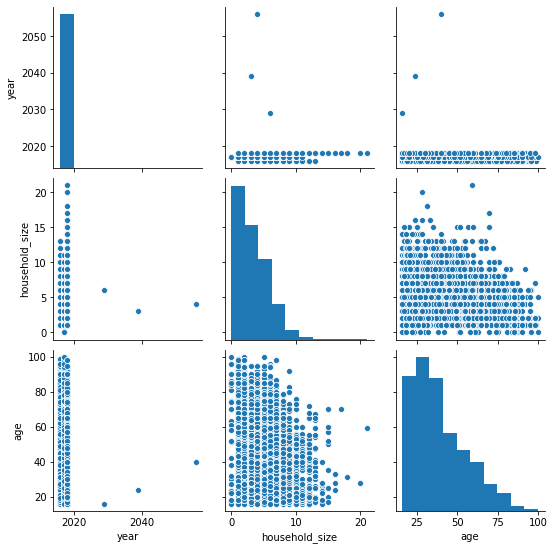

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
sns.pairplot(df_clean)
plt.show()

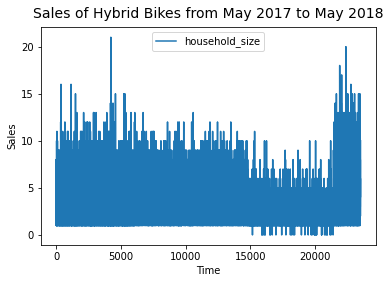

In [ ]:
# Plotting our line graph
df_clean[["household_size"]].plot()

# Giving a title to our line graph
plt.title("Total size of households", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Size')

# Labelling the x-axis
plt.xlabel('from scipy import stats')

# Displaying our graph
plt.show()

In [ ]:
# perfomring a z-test on age
from scipy import stats
stats.zscore(df_clean['age'])

array([-0.89624712,  1.88834928, -0.77517771, ..., -0.71464301,
       -0.53303889, -1.13838594])

In [ ]:
# performing a z-test on household size
stats.zscore(df_clean['household_size'])

array([-0.30188629,  0.57487037,  0.57487037, ...,  0.57487037,
        1.45162703,  2.76676201])

In [ ]:
# convert the values in our categorical columns to numerals so as to work wit them
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df_clean['gender'] = number.fit_transform(df_clean['gender'].astype('str')) 
df_clean['bank_acc'] = number.fit_transform(df_clean['bank_acc'].astype('str')) 
df_clean['location'] = number.fit_transform(df_clean['location'].astype('str')) 
df_clean['marital_status'] = number.fit_transform(df_clean['marital_status'].astype('str')) 
df_clean['education'] = number.fit_transform(df_clean['education'].astype('str')) 
df_clean['relationship'] = number.fit_transform(df_clean['relationship'].astype('str')) 
df_clean['cell_phone'] = number.fit_transform(df_clean['cell_phone'].astype('str')) 
#df_clean['job_type'] = number.fit_transform(df_clean['job_type'].astype('str')) 

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         23343 non-null  object 
 1   year            23343 non-null  int64  
 2   bank_acc        23343 non-null  int64  
 3   location        23343 non-null  int64  
 4   cell_phone      23343 non-null  int64  
 5   household_size  23343 non-null  float64
 6   age             23343 non-null  float64
 7   gender          23343 non-null  int64  
 8   relationship    23343 non-null  int64  
 9   marital_status  23343 non-null  int64  
 10  education       23343 non-null  int64  
 11  job_type        23343 non-null  object 
dtypes: float64(2), int64(8), object(2)
memory usage: 2.9+ MB


In [ ]:
# preview the data
df_clean.head()

,country,year,bank_acc,location,cell_phone,household_size,age,gender,relationship,marital_status,education,job_type
0,Kenya,2018,1,0,1,3.0,24.0,0,5,2,4,Self employed
1,Kenya,2018,0,0,0,5.0,70.0,0,1,4,1,Government Dependent
2,Kenya,2018,1,1,1,5.0,26.0,1,3,3,6,Self employed
3,Kenya,2018,0,0,1,5.0,34.0,0,1,2,3,Formally employed Private
4,Kenya,2018,0,1,0,8.0,26.0,1,0,3,3,Informally employed


bank_acc yes = 1 and no = 0


---
location  rural = 0 and urban = 1


---

cell_phone yes = 1 and no = 0


---

gender female = 0 and male = 1


---




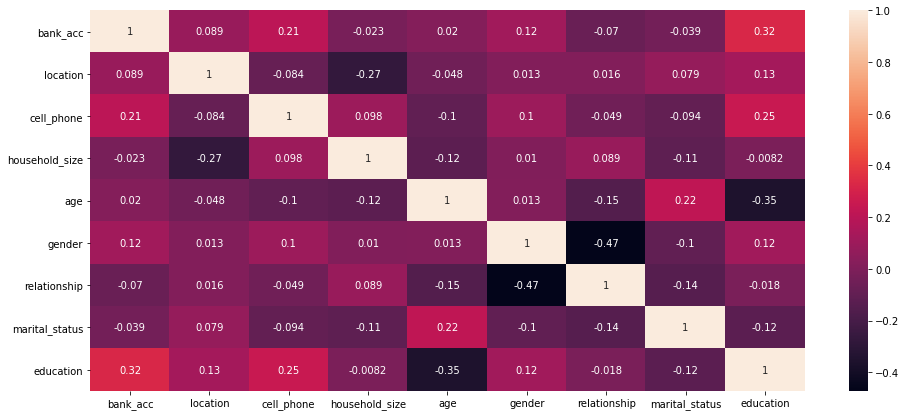

In [ ]:
# Implementing the Solution
# Figure out how we can predict which individuals are most likely to have or use a bank account.
plt.figure(figsize = (16,7))
sns.heatmap(df_clean[['bank_acc', 'location', 'cell_phone', 'household_size', 'age', 'gender', 'relationship', 'marital_status', 'education', 'job_type']].corr(),annot=True)
plt.show()

1. Location: As the location increases to one the likely hood of bank account also increases. But low positive correlation(0.089).
2. Cell Phone: As more people have a cell phone then likely hood of bank account increases. Low positive correlation(0.21).
3. Household Size: Household size has a negative correlation so as the size increases the likely hood of bank account drops. correlation = -0.0023.
4. Age: As age increases there is a small chance that the likely hood of owning a bank account increases. low positive correlation (0.02)
5. Gender: There is a correlation of 0.12 meaning that slightly more males have the likelyhood of owning a bank account
6. Education: The type of education has a chance of showing the likelyhood of a person owning a bank account. 


In [ ]:
# find the pearson correlation coefficient
corrrelation    = df_clean.corr(method="pearson");

print("Pearson correlation coefficient:");

corrrelation


Pearson correlation coefficient:


,year,bank_acc,location,cell_phone,household_size,age,gender,relationship,marital_status,education
year,1.000000,0.109946,0.204277,-0.060700,-0.048902,-0.019062,0.002012,0.001978,-0.026290,0.167485
bank_acc,0.109946,1.000000,0.088731,0.209520,-0.023050,0.019645,0.116153,-0.069969,-0.038855,0.322940
location,0.204277,0.088731,1.000000,-0.083583,-0.274053,-0.047647,0.013313,0.016426,0.079271,0.127404
cell_phone,-0.060700,0.209520,-0.083583,1.000000,0.098194,-0.104016,0.102205,-0.048695,-0.094389,0.252394
household_size,-0.048902,-0.023050,-0.274053,0.098194,1.000000,-0.119709,0.010139,0.088651,-0.110986,-0.008248
age,-0.019062,0.019645,-0.047647,-0.104016,-0.119709,1.000000,0.013336,-0.150320,0.221753,-0.352995
gender,0.002012,0.116153,0.013313,0.102205,0.010139,0.013336,1.000000,-0.472370,-0.102639,0.119476
relationship,0.001978,-0.069969,0.016426,-0.048695,0.088651,-0.150320,-0.472370,1.000000,-0.142725,-0.017648
marital_status,-0.026290,-0.038855,0.079271,-0.094389,-0.110986,0.221753,-0.102639,-0.142725,1.000000,-0.122349
education,0.167485,0.322940,0.127404,0.252394,-0.008248,-0.352995,0.119476,-0.017648,-0.122349,1.000000


From the two correlations we now observe similar results


# 4. Multivariate analysis

Regression analysis


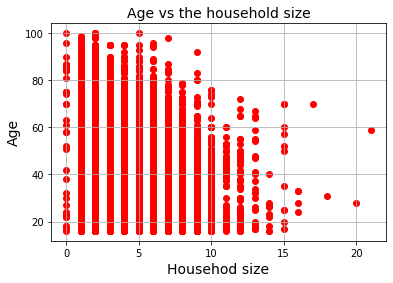

In [ ]:
 # perform analysis on the age and size of the household
plt.scatter(df_clean['household_size'], df_clean['age'], color='red')
plt.title('Age vs the household size', fontsize=14)
plt.xlabel('Househod size', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()

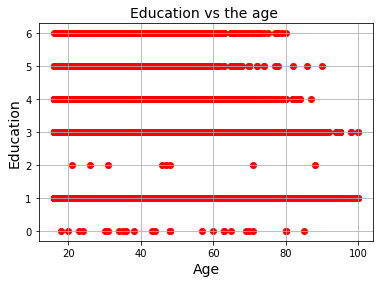

In [ ]:
# perform analysis on the age, bank account and education
plt.scatter(df_clean['age'], df_clean['education'], color='red')
plt.title('Education vs the age ', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Education', fontsize=14)
plt.grid(True)
plt.show()

## **Dimension reduction**

We will be using Linear Discriminant Analysis(LDA)

In [ ]:
# create our labels and feature sets
X = df_clean.iloc[:, 2:11].values
y = df_clean.iloc[:, 3].values

In [ ]:
# divide the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# performing feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# Evaluating performance 


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2851    0]
 [   0 1818]]
Accuracy1.0


Plot the LDA

In [244]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [245]:
# variance of the columns
lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

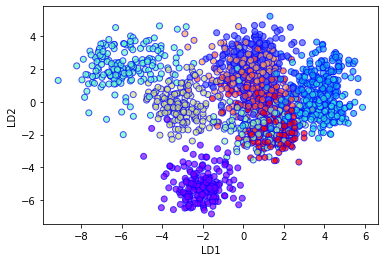

In [241]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# 5. Challenging the solution

In [248]:
# Reviewing the Solution 

# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = df_clean
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=23343, random_state=1)
boot.to_csv('new.csv')



In [279]:
url = "/content/new.csv"
df_new = pd.read_csv(url)
df_new.head()
df_new = df_new.drop(columns=['Unnamed: 0'])

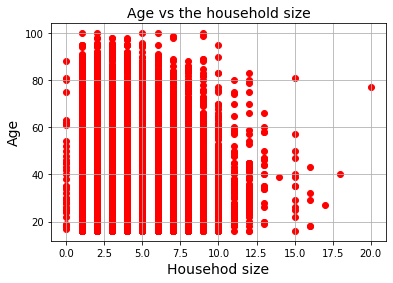

In [280]:
 # perform analysis on the age and size of the household
plt.scatter(df_new['household_size'], df_clean['age'], color='red')
plt.title('Age vs the household size', fontsize=14)
plt.xlabel('Househod size', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()

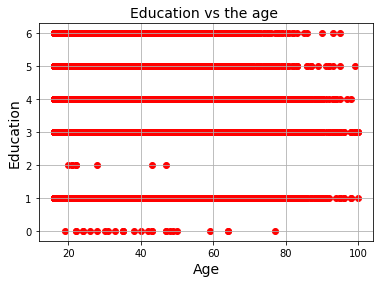

In [251]:
# perform analysis on the age, bank account and education
plt.scatter(df_new['age'], df_clean['education'], color='red')
plt.title('Education vs the age ', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Education', fontsize=14)
plt.grid(True)
plt.show()

In [281]:
# create our labels and feature sets
X = df_new.iloc[:, 2:11].values
y = df_new.iloc[:, 3].values

In [282]:
# divide the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [283]:
# performing feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [284]:
# Performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [285]:
# training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [286]:
# Evaluating performance 


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2864    0]
 [   0 1805]]
Accuracy1.0
